<a href="https://colab.research.google.com/github/hemhosanna/titanic/blob/main/titanic_dataset_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('titanic.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<ipython-input-5-9f89e5e775ad>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


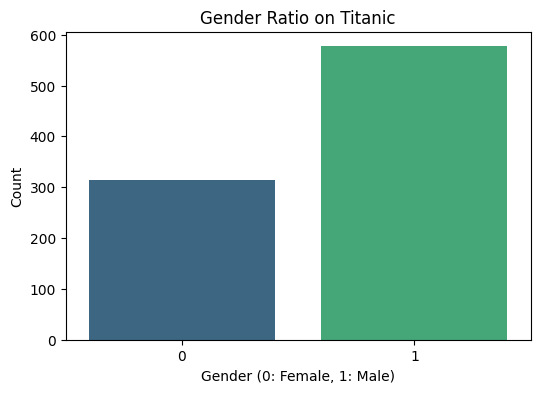

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('titanic.csv')
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df = pd.get_dummies(df, columns=['Embarked', 'Sex'], drop_first=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
gender_counts = df['Sex_male'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Gender Ratio on Titanic')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv('titanic.csv')
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df = pd.get_dummies(df, columns=['Embarked', 'Sex'], drop_first=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}')

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('Classification Report:')
print(classification_report(y_test, y_pred))
results = pd.DataFrame({
    'PassengerId': X_test.index,
    'Actual Survived': y_test.values,
    'Predicted Survived': y_pred,
})
pd.set_option('display.max_rows', None)
print('\nPrediction Results:')
print(results)


Accuracy: 80.45
Confusion Matrix:
[[89 16]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179


Prediction Results:
     PassengerId  Actual Survived  Predicted Survived
0            709                1                   0
1            439                0                   0
2            840                0                   0
3            720                1                   1
4             39                1                   1
5            290                1                   1
6            300                1                   1
7            333                0                   0
8            208                1                   1
9            136                1   